In [78]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.ndimage as ndimage
from Bio import SeqIO

In [79]:
def get_segments(aa_seq, label_seq, segment_type, accession, description):
    #print(label_seq)
    slices = ndimage.find_objects(ndimage.label(label_seq)[0])
    #print(slices)
    ds = []
    for s in slices:
        #print(s)
        segment = aa_seq[s[0]]  # Unpack 1-element slice tuple
        #print(segment)
        d = {'accession': accession, 'description': description, 'segment_type': segment_type, 'len': len(segment), 'index': (s[0].start, s[0].stop)}
        aa_counts = count_amino_acids(segment)
        d.update(aa_counts)
        ds.append(d)
    return ds


def count_amino_acids(aa_seq):
    aa_codes = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H',
                'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 
                'Y', 'V', 'O', 'U', 'B', 'Z', 'X', 'J']
    d = {aa: 0 for aa in aa_codes}
    for aa in aa_seq:
        d[aa] += 1
    return d

In [80]:
fasta_seq = SeqIO.parse('../analysis/mobidb_validation/generate_fastas/out/allseq.fasta', 'fasta')
fasta_disorder = SeqIO.parse('../analysis/mobidb_validation/generate_fastas/out/alldisorder.fasta', 'fasta')

In [81]:
protein_seq_dict = {}
for protein in fasta_seq:
    protein_seq_dict[protein.id.split("|")[0]] = str(protein.seq)

In [82]:
rows = []
for protein in fasta_disorder:
    dis_labels = [s == '1' for s in protein.seq]
    ord_labels = [s == '0' for s in protein.seq]

    accession = protein.id.split("|")[0]
    description = protein.description.split("|")[-1]
    aa_seq = protein_seq_dict[accession]
    
    # Disordered regions have the code 'D' and ordered regions have the code 'O'
    # The entire protein is added with the code 'P'
    ds_dis = get_segments(aa_seq, dis_labels, 'D', accession, description)
    ds_ord = get_segments(aa_seq, ord_labels, 'O', accession, description)
    ds_all = get_segments(aa_seq, [True for _ in range(len(aa_seq))], 'P', accession, description)

    # Add ds to rows
    rows.extend(ds_dis)
    rows.extend(ds_ord)
    rows.extend(ds_all)
df1 = pd.DataFrame(rows)
print(df1)

       accession                                        description  \
0         Q9UPN6  SR-related and CTD-associated factor 8 OS=Homo...   
1         Q9UPN6  SR-related and CTD-associated factor 8 OS=Homo...   
2         H0USY8  sequence OS=Ancylostoma ceylanicum OX=53326 GN...   
3         H0USY8  sequence OS=Ancylostoma ceylanicum OX=53326 GN...   
4         P04631  Protein S100-B OS=Rattus norvegicus (Rat) OX=1...   
...          ...                                                ...   
111523    Q9JKS6  Protein piccolo OS=Rattus norvegicus (Rat) OX=...   
111524    P20929     Nebulin OS=Homo sapiens (Human) OX=9606 GN=NEB   
111525    P20929     Nebulin OS=Homo sapiens (Human) OX=9606 GN=NEB   
111526    P20929     Nebulin OS=Homo sapiens (Human) OX=9606 GN=NEB   
111527    P20929     Nebulin OS=Homo sapiens (Human) OX=9606 GN=NEB   

       segment_type   len         index    A    R    N    D   C  ...    T   W  \
0                 O  1271     (0, 1271)   62   87   61   63   6  .

In [83]:
df1

,accession,description,segment_type,len,index,A,R,N,D,C,...,T,W,Y,V,O,U,B,Z,X,J
0,Q9UPN6,SR-related and CTD-associated factor 8 OS=Homo...,O,1271,"(0, 1271)",62,87,61,63,6,...,62,11,16,99,0,0,0,0,0,0
1,Q9UPN6,SR-related and CTD-associated factor 8 OS=Homo...,P,1271,"(0, 1271)",62,87,61,63,6,...,62,11,16,99,0,0,0,0,0,0
2,H0USY8,sequence OS=Ancylostoma ceylanicum OX=53326 GN...,O,243,"(0, 243)",16,18,11,16,0,...,10,1,3,10,0,0,0,0,0,0
3,H0USY8,sequence OS=Ancylostoma ceylanicum OX=53326 GN...,P,243,"(0, 243)",16,18,11,16,0,...,10,1,3,10,0,0,0,0,0,0
4,P04631,Protein S100-B OS=Rattus norvegicus (Rat) OX=1...,O,92,"(0, 92)",4,1,2,7,2,...,3,0,1,7,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111523,Q9JKS6,Protein piccolo OS=Rattus norvegicus (Rat) OX=...,P,5085,"(0, 5085)",348,209,80,248,32,...,389,16,111,252,0,0,0,0,0,0
111524,P20929,Nebulin OS=Homo sapiens (Human) OX=9606 GN=NEB,D,38,"(6609, 6647)",7,1,1,6,0,...,1,1,2,2,0,0,0,0,0,0
111525,P20929,Nebulin OS=Homo sapiens (Human) OX=9606 GN=NEB,O,6609,"(0, 6609)",469,270,302,515,52,...,349,90,407,388,0,0,0,0,0,0
111526,P20929,Nebulin OS=Homo sapiens (Human) OX=9606 GN=NEB,O,22,"(6647, 6669)",2,2,1,0,0,...,3,0,2,2,0,0,0,0,0,0


# Length Distribution of Disordered Regions in Proteins

Text(0.5, 1.0, 'Length of Disordered Regions')

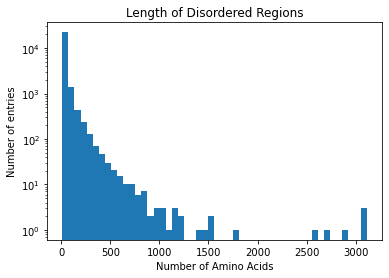

In [22]:
disorder = df1[df1['segment_type'] == 'D']
plt.hist(disorder['len'], bins=50)
plt.yscale('log')
plt.ylabel('Number of entries')
plt.xlabel('Number of Amino Acids')
plt.title('Length of Disordered Regions')

## Length of Disordered Regions Upper Limit

Length of the disordered regions drops off significantly after about a length of 60, making the upper limit of the length of our data amino acid sequence be 120, because we want >50% unmasked (amino acid sequences of the ordered regions).  

(array([11812.,  4799.,  2475.,  1344.,   832.,   596.,   438.,   350.,
          291.,   239.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <BarContainer object of 10 artists>)

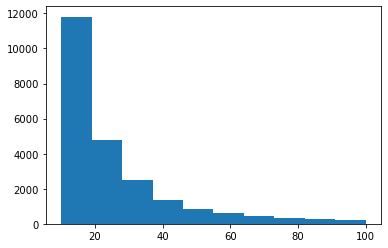

In [92]:
disless100 = disorder[disorder['len'] <= 100]
plt.hist(disless100['len'])

The cut off for a disordered region is more than 30 amino acid residues. And we want the max disordered region length to be 60 amino acids, as stated above. 

(array([1069.,  882.,  671.,  490.,  409.,  335.,  299.,  273.,  220.,
         231.]),
 array([30., 34., 38., 42., 46., 50., 54., 58., 62., 66., 70.]),
 <BarContainer object of 10 artists>)

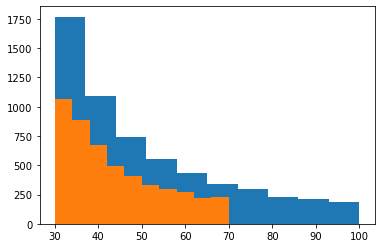

In [105]:
dismore30 = disless100[disless100['len'] >= 30]
plt.hist(dismore30['len'])
disless60 = dismore30[dismore30['len'] <= 70] 
plt.hist(disless60['len'])

(array([1768., 1094.,  741.,  552.,  434.,  344.,  294.,  231.,  211.,
         189.]),
 array([ 30.,  37.,  44.,  51.,  58.,  65.,  72.,  79.,  86.,  93., 100.]),
 <BarContainer object of 10 artists>)

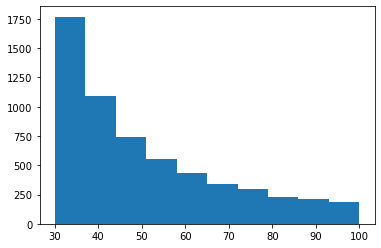

In [98]:
plt.hist(dismore30['len'])

(array([817., 726., 605., 474., 372., 326., 283., 253., 224., 276.]),
 array([30., 33., 36., 39., 42., 45., 48., 51., 54., 57., 60.]),
 <BarContainer object of 10 artists>)

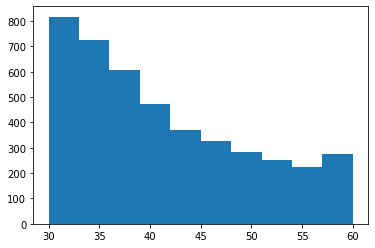

In [99]:
plt.hist(disless60['len'])

In [96]:
disless60

,accession,description,segment_type,len,A,R,N,D,C,Q,...,T,W,Y,V,O,U,B,Z,X,J
52,P26039,Talin-1 OS=Mus musculus (Mouse) OX=10090 GN=Tln1,D,39,0,2,1,5,0,1,...,4,0,0,0,0,0,0,0,0,0
58,P26039,Talin-1 OS=Mus musculus (Mouse) OX=10090 GN=Tln1,D,30,4,1,0,0,2,2,...,1,0,0,2,0,0,0,0,0,0
71,P39748,Flap endonuclease 1 OS=Homo sapiens (Human) OX...,D,40,7,4,0,0,0,5,...,1,0,0,3,0,0,0,0,0,0
90,P62314,Small nuclear ribonucleoprotein Sm D1 OS=Homo ...,D,42,2,12,0,1,0,0,...,1,0,0,4,0,0,0,0,0,0
95,P34257,Transposable element Tc3 transposase OS=Caenor...,D,31,3,3,2,1,0,1,...,1,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111386,O18409,sequence OS=Drosophila melanogaster (Fruit fly...,D,40,13,0,0,0,0,2,...,1,0,0,1,0,0,0,0,0,0
111479,Q00963,Spectrin beta chain OS=Drosophila melanogaster...,D,50,6,2,3,4,0,2,...,2,0,2,2,0,0,0,0,0,0
111492,Q8RL76,sequence OS=Pseudomonas fluorescens OX=294 GN=...,D,30,8,1,0,0,0,6,...,4,0,0,2,0,0,0,0,0,0
111517,Q9JKS6,Protein piccolo OS=Rattus norvegicus (Rat) OX=...,D,35,2,3,3,0,0,4,...,2,1,2,4,0,0,0,0,0,0


(array([1543., 1079.,  698.,  536.,  438.,  354.,  285.,  259.,  205.,
         222.]),
 array([30., 36., 42., 48., 54., 60., 66., 72., 78., 84., 90.]),
 <BarContainer object of 10 artists>)

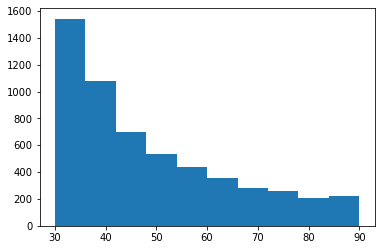

In [103]:
disless70 = dismore30[dismore30['len'] <= 90]
plt.hist(disless70['len'])

In [104]:
disless70

,accession,description,segment_type,len,A,R,N,D,C,Q,...,T,W,Y,V,O,U,B,Z,X,J
12,O95405,Zinc finger FYVE domain-containing protein 9 O...,D,89,10,8,2,5,9,2,...,4,1,1,6,0,0,0,0,0,0
13,O95405,Zinc finger FYVE domain-containing protein 9 O...,D,89,11,3,6,2,1,6,...,4,1,1,7,0,0,0,0,0,0
52,P26039,Talin-1 OS=Mus musculus (Mouse) OX=10090 GN=Tln1,D,39,0,2,1,5,0,1,...,4,0,0,0,0,0,0,0,0,0
54,P26039,Talin-1 OS=Mus musculus (Mouse) OX=10090 GN=Tln1,D,82,4,2,2,3,0,8,...,3,0,1,6,0,0,0,0,0,0
58,P26039,Talin-1 OS=Mus musculus (Mouse) OX=10090 GN=Tln1,D,30,4,1,0,0,2,2,...,1,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111450,Q62234,Myomesin-1 OS=Mus musculus (Mouse) OX=10090 GN...,D,72,2,3,2,4,3,3,...,4,3,2,5,0,0,0,0,0,0
111479,Q00963,Spectrin beta chain OS=Drosophila melanogaster...,D,50,6,2,3,4,0,2,...,2,0,2,2,0,0,0,0,0,0
111492,Q8RL76,sequence OS=Pseudomonas fluorescens OX=294 GN=...,D,30,8,1,0,0,0,6,...,4,0,0,2,0,0,0,0,0,0
111517,Q9JKS6,Protein piccolo OS=Rattus norvegicus (Rat) OX=...,D,35,2,3,3,0,0,4,...,2,1,2,4,0,0,0,0,0,0
